# Dataset link:

### https://www.kaggle.com/code/ranasabrii/life-expectancy-regression-with-ann/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline
sns.set(style = "darkgrid", font_scale = 1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")

In [3]:
df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.tail(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,25.5,39,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [5]:
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1486,Lesotho,2003,Developing,45.5,648.0,5,1.99,5.300902,17.0,1,26.4,7,9.0,7.13,9.0,33.8,63.636279,191897.0,1.2,1.1,0.440,10.5
2899,Yemen,2006,Developing,63.0,242.0,39,0.04,0.000000,78.0,8079,34.5,51,78.0,4.82,78.0,0.1,NaN,NaN,13.9,13.8,0.475,8.7
91,Argentina,2004,Developing,74.7,13.0,11,7.63,719.366380,81.0,0,56.3,12,91.0,6.84,98.0,0.1,4251.574348,38728696.0,1.1,1.0,0.775,16.3
10,Afghanistan,2005,Developing,57.3,291.0,85,0.02,1.388648,66.0,1296,14.2,118,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9
247,Belgium,2008,Developed,79.5,87.0,0,10.47,7191.051507,98.0,98,61.3,1,99.0,9.60,99.0,0.1,48424.589270,179973.0,0.8,0.8,0.874,15.8


In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.title()

In [8]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness  1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [9]:
df.rename(columns = {"Thinness  1-19 Years" : "Thinness 1-19 Years"}, inplace = True)

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life Expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   Infant Deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage Expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  Bmi                              2904 non-null   float64
 11  Under-Five Deaths                2938 non-null   int64  
 12  Polio               

### Observations

### Missing Values Present:
#### Several columns have missing values (especially Population, Gdp, Hepatitis B).
#### You will need to handle these using imputation or row/column dropping based on strategy.

### Categorical Columns:
#### Country and Status are categorical.
#### Country likely has many unique values.
#### Status likely has few (probably binary: Developed/Developing).

### Potential Target Variable:
#### Life Expectancy is likely the target in a regression task.

### Multiyear Data:

#### Since there is a Year column, this dataset spans multiple years per country.
#### Can be grouped by Country and Year for time series or trend analysis.

### Dataset Size:

#### Moderate-sized (2,938 rows), likely manageable for most ML algorithms.

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life Expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
Infant Deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
Percentage Expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
Bmi,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
Under-Five Deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


### **Key Insights:**

1. **Life Expectancy (Target Variable)**

   * Mean: \~69 years, Range: 36.3 – 89
   * Large variation 

2. **Strong Predictors can be**:

   * **Income Composition of Resources** (HDI component)
   * **Schooling** (Avg. education years)
   * **Immunization Rates** (Polio, Diphtheria, Hepatitis B)
   * **GDP per capita**
   * **HIV/AIDS prevalence** (negatively correlated)

3. **Skewed Features (Need Transformations):**

   * Measles, GDP, Population, Percentage Expenditure, Infant Deaths, Under-Five Deaths
   * Use **log transformation** to reduce skew.

4. **Clean-up is Needed:**

   * Missing values in several columns (Hepatitis B, GDP, Population, etc.)
   * Possible outliers in BMI, Schooling, Infant Deaths, HIV/AIDS
   * Min value of 0 or 1 in BMI, Schooling, etc. may indicate **data errors**.

In [13]:
df.describe(include = ['object']).T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


# Missing Values

In [14]:
df.isnull().sum().to_frame().rename(columns = {0: "Total No. of Missing Values"})

,Total No. of Missing Values
Country,0
Year,0
Status,0
Life Expectancy,10
Adult Mortality,10
Infant Deaths,0
Alcohol,194
Percentage Expenditure,0
Hepatitis B,553
Measles,0


### Since Life Expectancy is the target variable and we have only 10 missing values for my target variable
### So we will drop the missing values
### 10 rows is just 0.34% of your dataset — negligible loss.

In [15]:
df = df.dropna(subset = ["Life Expectancy"])

In [16]:
# Total number of rows
total_rows = df.shape[0]

# Number of rows with at least one missing value
rows_with_missing = df.isnull().any(axis = 1).sum()

print(f"Total Rows : {total_rows}")
print(f"Rows with Missing Values : {rows_with_missing}")
print(f"Percentage : {rows_with_missing / total_rows * 100:.2f}%")


Total Rows : 2928
Rows with Missing Values : 1279
Percentage : 43.68%


## So we have 43.68% rows which have missing values 

### We will treat the missing for:
                "Alcohol", "Percentage Expenditure", "Bmi", "Under-Five Deaths", "Total Expenditure", 
                "Hiv/Aids", "Gdp", "Population", "Thinness 1-19 Years", 
                "Thinness 5-9 Years", "Income Composition Of Resources", "SchoolingAdult Mortality 
                "BY REPLACING THEM WITH MEDIAN VALUE'.
### For (Hepatitis B, Polio, Diphtheria) we will treat the missing by replacing them with the mode.

In [17]:
# Fill Life Expectancy & Adult Mortality with median per Status group
df["Adult Mortality"] = df.groupby("Status")["Adult Mortality"].transform(lambda x: x.fillna(x.median()))

# Mode imputation for vaccine- related discrete data
for col in ["Hepatitis B","Polio","Diphtheria"]:
    df[col] = df[col].fillna(df[col].mode()[0])

# Median imputation for continuous/skewed columns
median_impute_cols = ["Alcohol", "Percentage Expenditure", "Bmi", "Under-Five Deaths", "Total Expenditure", 
                      "Hiv/Aids", "Gdp", "Population", "Thinness 1-19 Years", 
                      "Thinness 5-9 Years", "Income Composition Of Resources", "Schooling"]
for col in median_impute_cols:
    df[col] = df[col].fillna(df[col].median())

### We are doing the fillna with median separately in Adult Mortality because in the
### Developed country and Developing country the Adult Mortality rate would be different

# Ckecking the missing values after treating

In [18]:
df.isnull().sum().to_frame().rename(columns = {0: "Total No. of Missing Values"})

,Total No. of Missing Values
Country,0
Year,0
Status,0
Life Expectancy,0
Adult Mortality,0
Infant Deaths,0
Alcohol,0
Percentage Expenditure,0
Hepatitis B,0
Measles,0


# Clearly after treating them we don't have any missing values

# Checking if there is any duplicated values

In [19]:
df.duplicated().sum()

0

In [20]:
numerical_df = df.select_dtypes(include = [np.number])
numerical_df.head(5)

,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
categorical_df = df.select_dtypes(include = ['object'])
categorical_df.head(5)

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing


# Correlation Matrix

In [22]:
# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only = True)

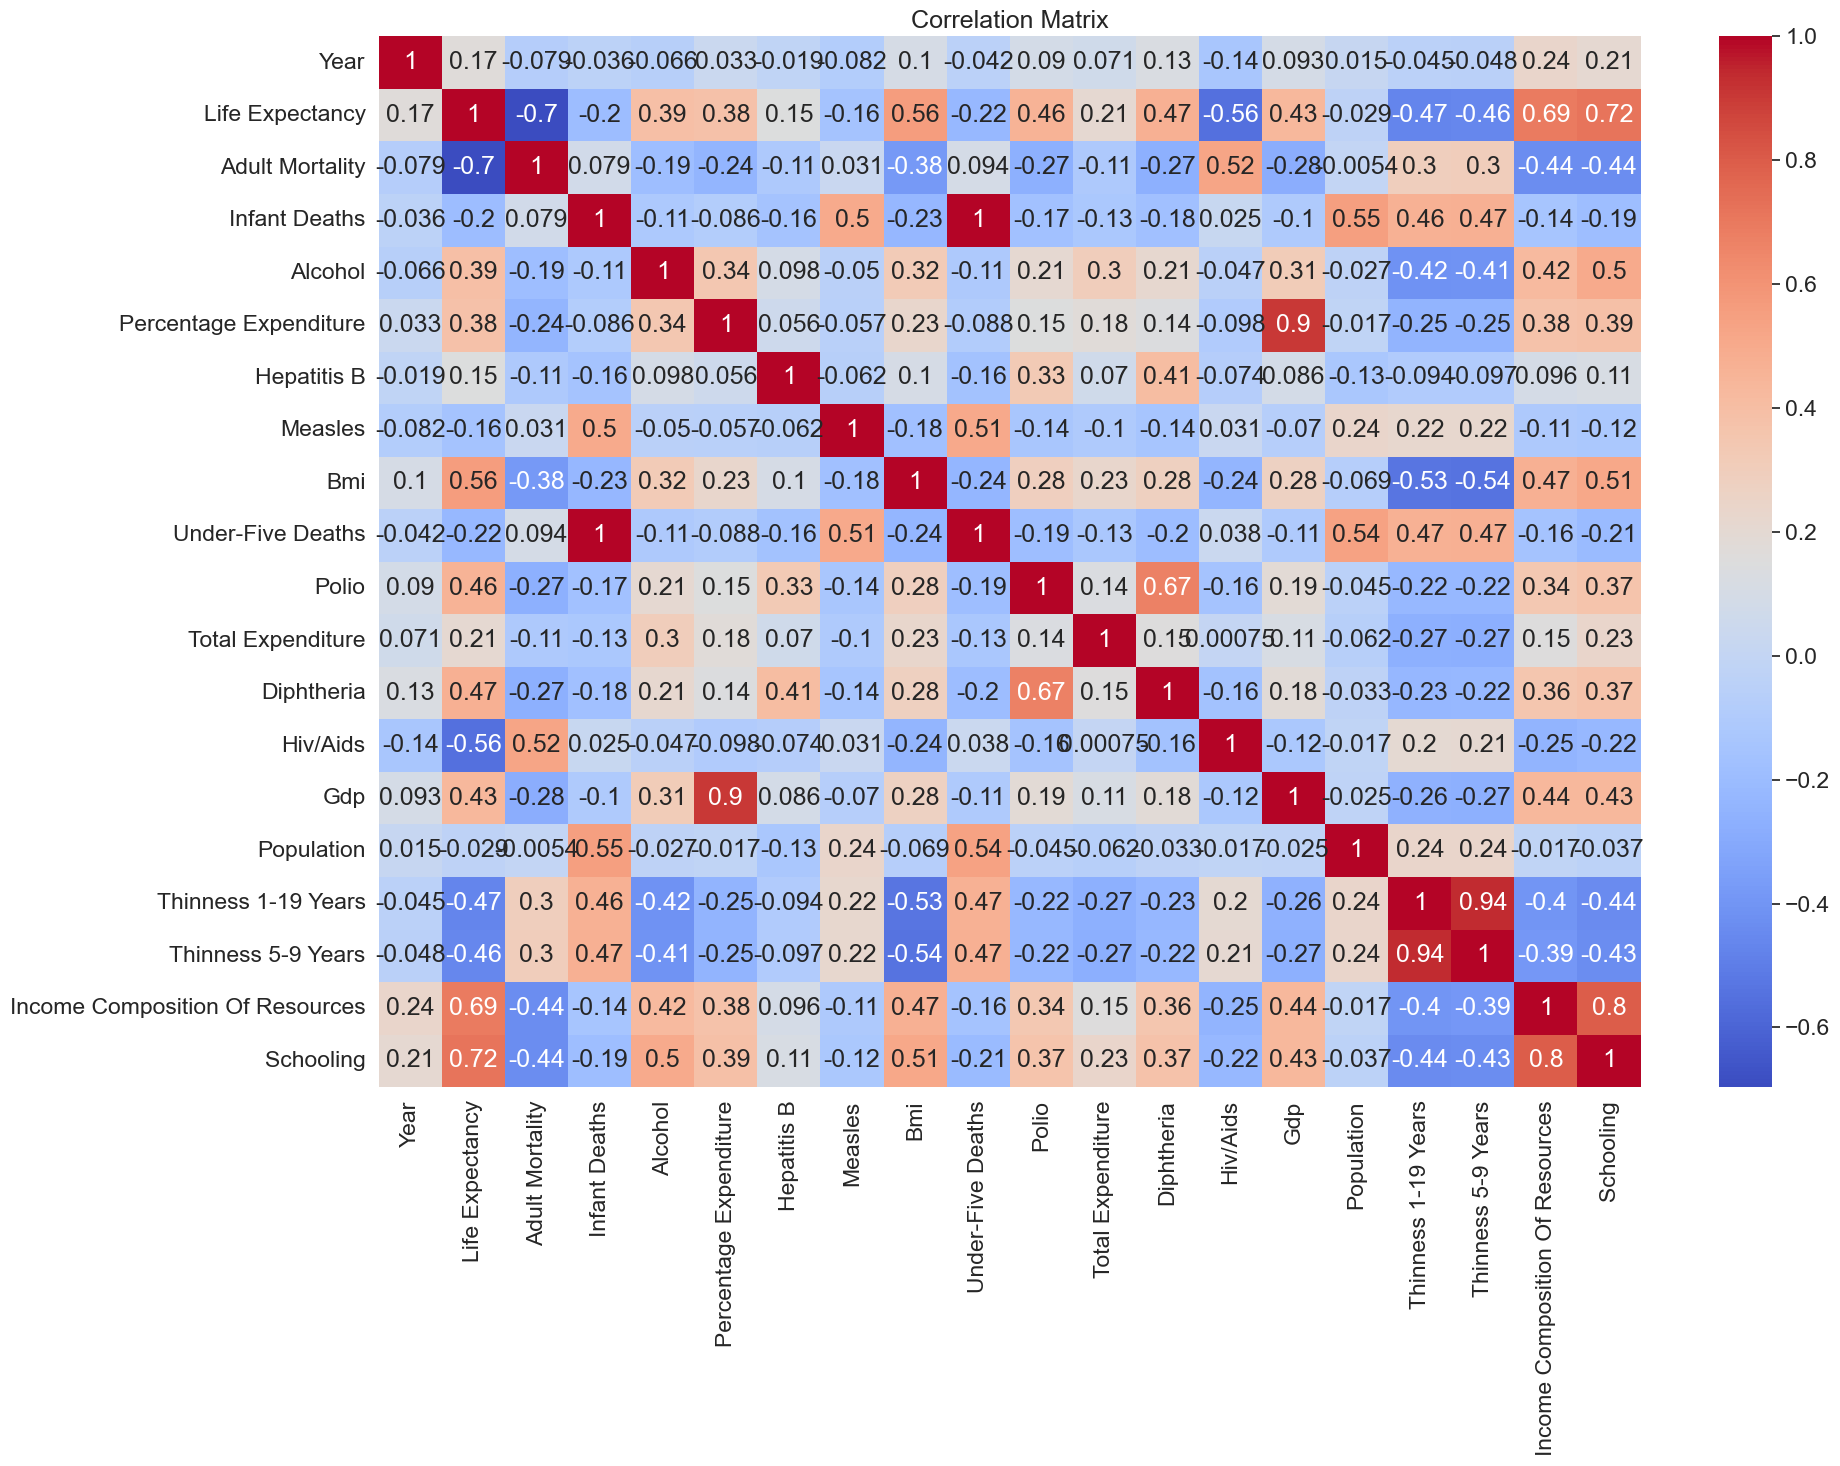

In [23]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## From the above plot we can say that there is a very high corelation between 
1) infant deaths and under-five deaths
2) percentage expenditure and GDP
3) Income composition of resources and Schooling
4) Life expectancy and Income composition of resources
5) Schooling and Life expectancy

# Univariate Analysis (Single Variable)

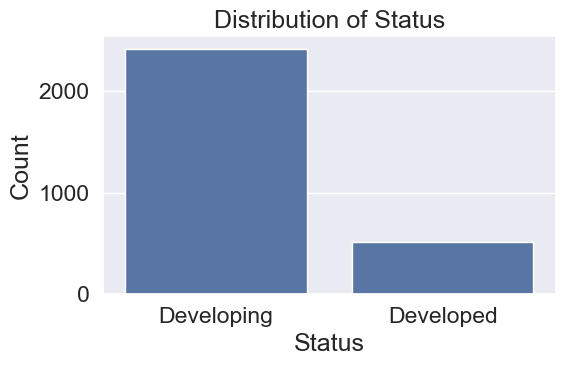

In [24]:
plt.figure(figsize = (6,4))
sns.countplot(x = "Status", data = df)
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Distribution of Status")
plt.tight_layout()
plt.show()

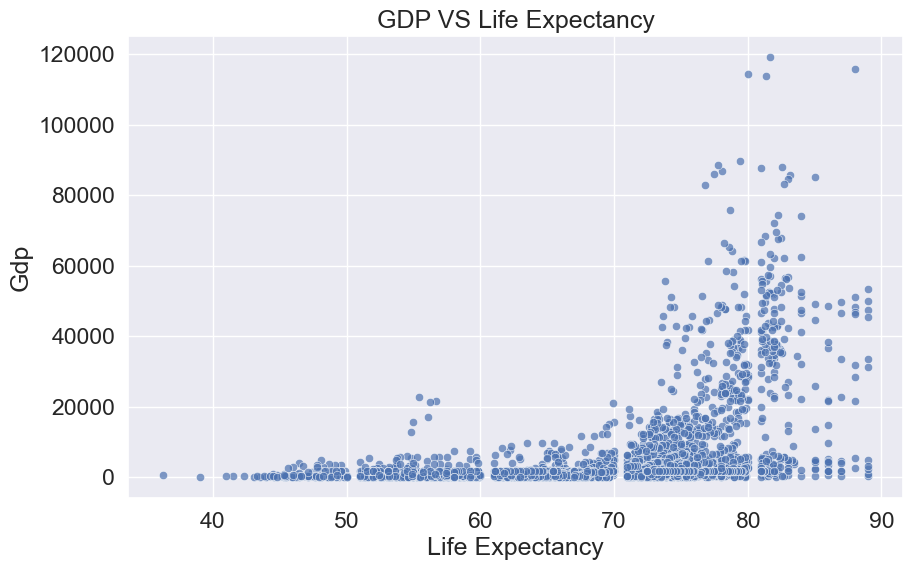

In [25]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Life Expectancy", y = "Gdp", palette = "virdis", alpha = 0.7)
plt.title("GDP VS Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Gdp")
plt.grid(True)
plt.tight_layout
plt.show()

### The plot shows that countries with higher GDP generally have longer life expectancy.
### Below about \$40k GDP per capita, life expectancy rises sharply with income.
### Beyond that, the increase slows, with most wealthy countries clustering around 80–85 years.
### A few outliers have very high GDP but no major life expectancy gains, and some have high GDP yet relatively low life expectancy.

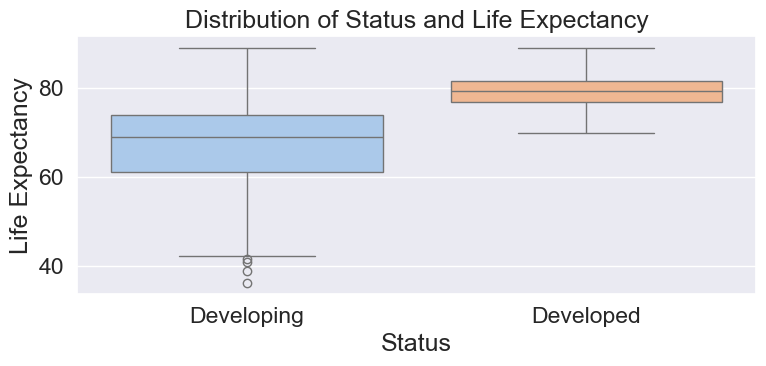

In [26]:
plt.figure(figsize = (8,4))
sns.boxplot(data = df, x = "Status", y = "Life Expectancy", palette = "pastel")
plt.title("Distribution of Status and Life Expectancy")
plt.xlabel("Status")
plt.ylabel("Life Expectancy")
plt.tight_layout()
plt.show()

## From the above boxplot we can infer that:
1) Min Life Expectancy of the Deploped Nation is nearly 70 which is very good.
2) But in Developing Nation Min Life Expectancy is 42-43 which is very bad considering its a developing nation

# Checking and Treating the outlier

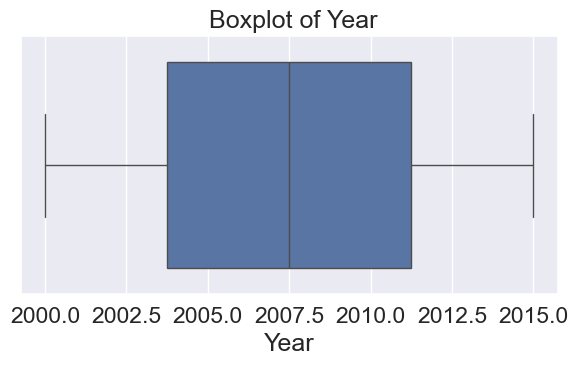

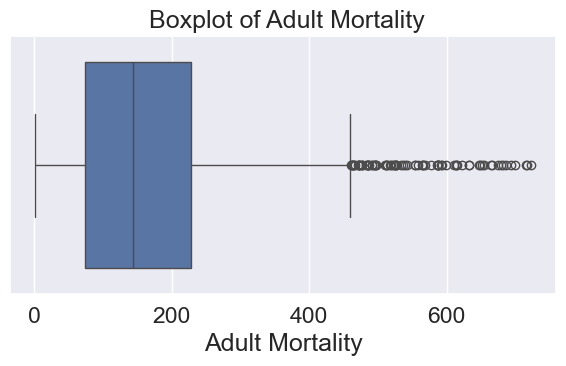

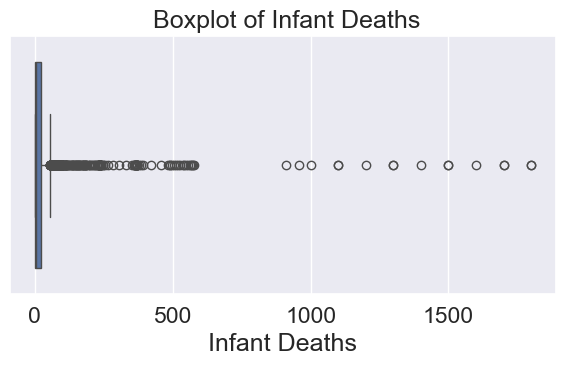

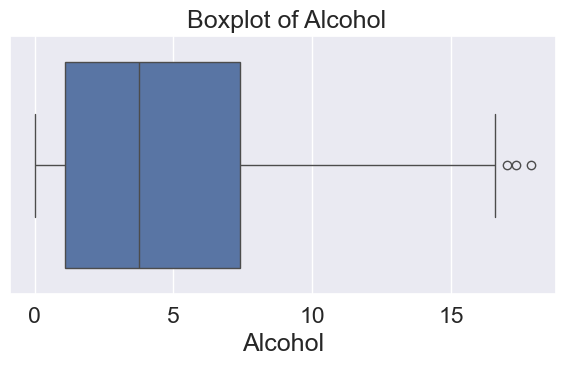

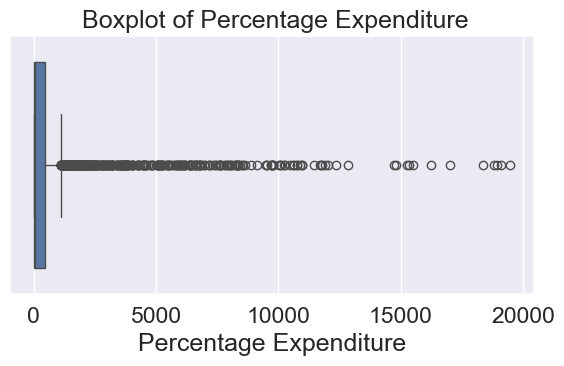

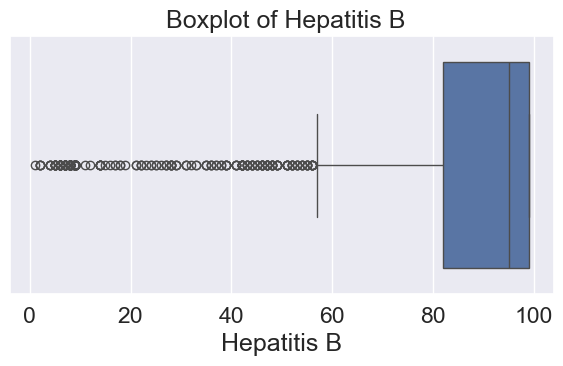

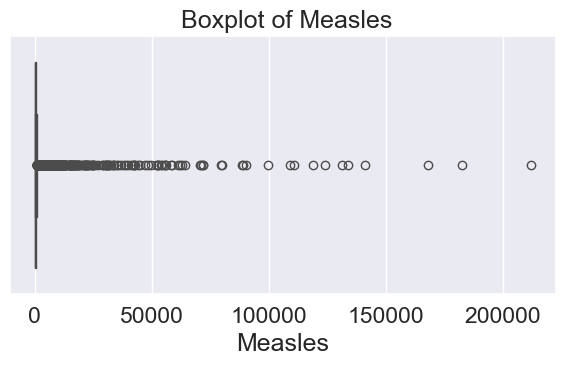

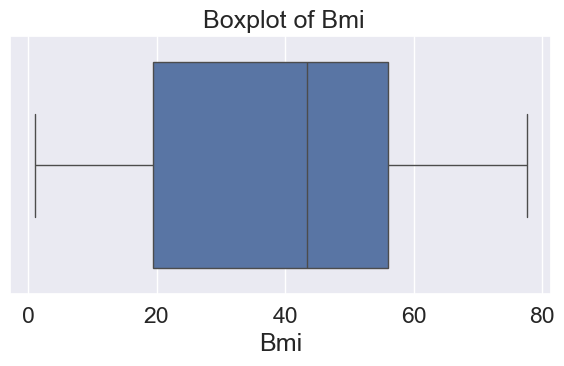

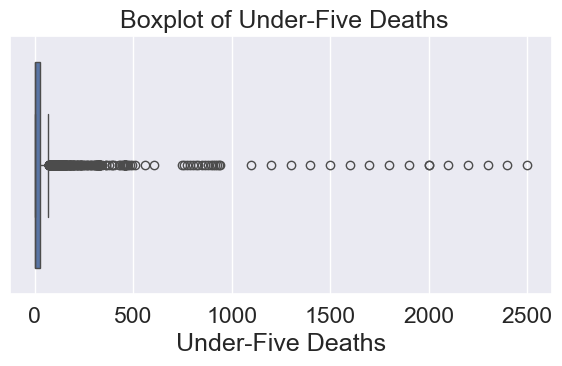

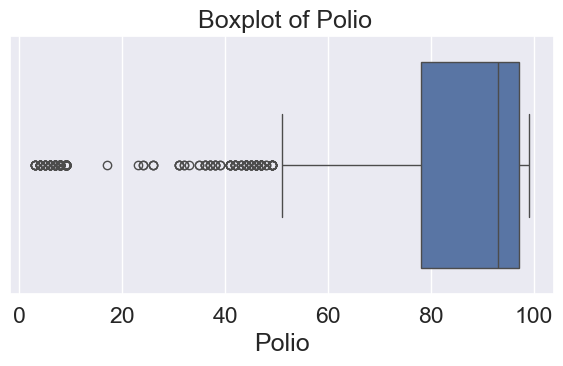

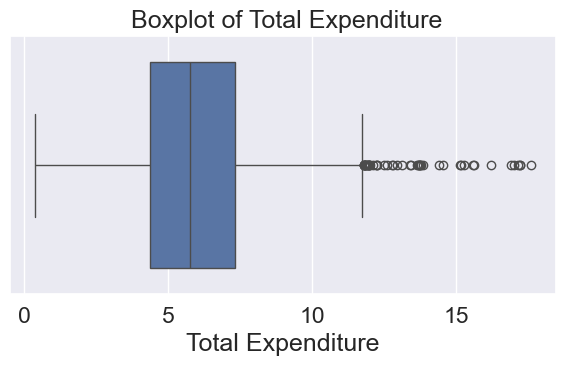

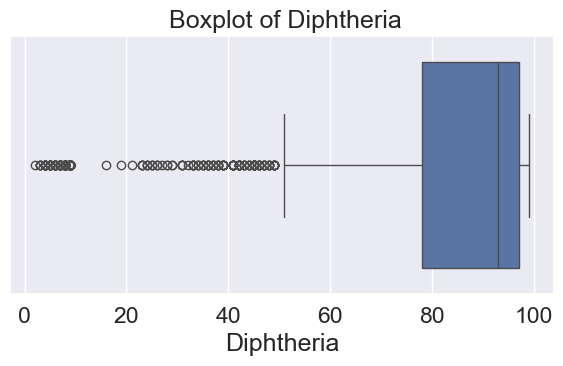

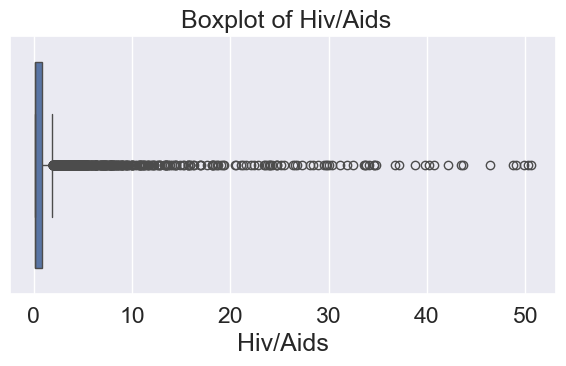

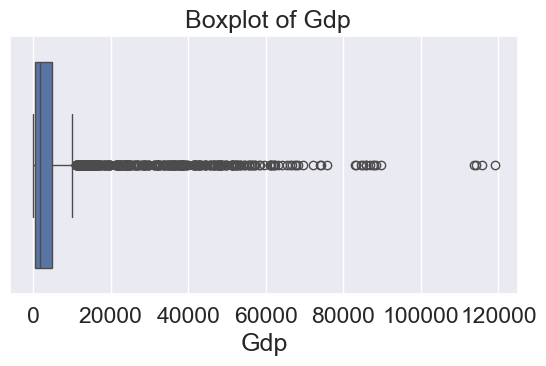

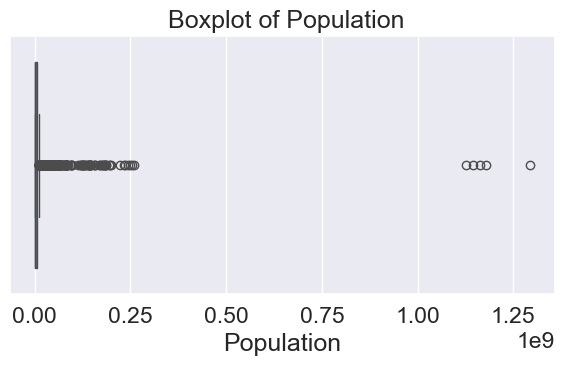

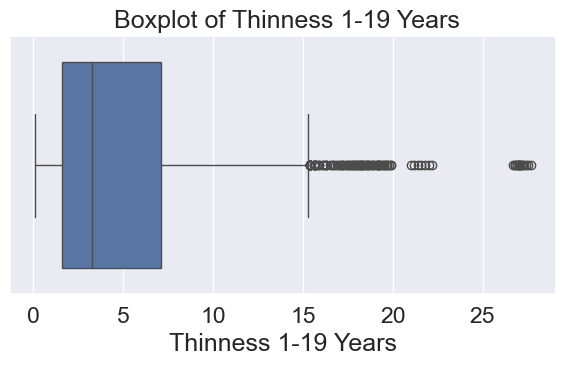

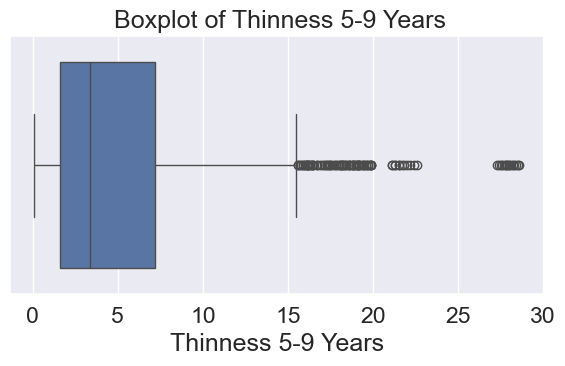

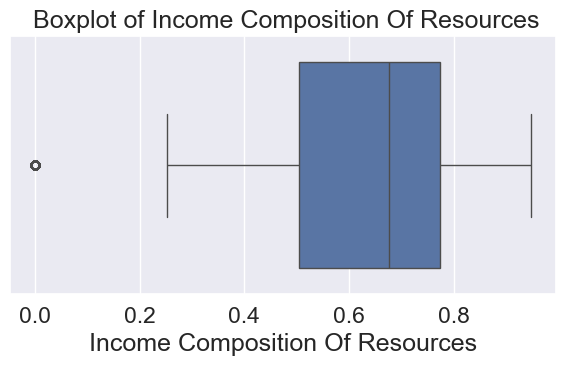

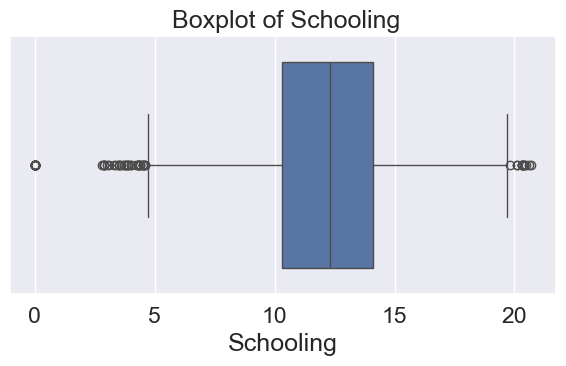

In [27]:
numerical_cols = df.select_dtypes(include = ["number"]).drop(columns = ["Life Expectancy"]).columns
for col in numerical_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x = df[col])
    plt.title(f" Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [28]:
def detect_outlier_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (column < lower_bound) | (column > upper_bound)

# Store results
total_rows = len(df)
outlier_summary = {}

# Apply to each numeric column
for col in numerical_cols:
    outlier_mask = detect_outlier_iqr(df[col])
    outlier_count = outlier_mask.sum()
    percentage = (outlier_count / total_rows) * 100

    outlier_summary[col] = {
        'Outlier Count': outlier_count,
        'Percentage': round(percentage, 2)
    }

# Print the summary
print("\nColumn-wise Outlier Percentage:\n")
for col, stats in outlier_summary.items():
    print(f"{col} → {stats['Outlier Count']} outliers ({stats['Percentage']}%)")



Column-wise Outlier Percentage:

Year → 0 outliers (0.0%)
Adult Mortality → 82 outliers (2.8%)
Infant Deaths → 315 outliers (10.76%)
Alcohol → 3 outliers (0.1%)
Percentage Expenditure → 388 outliers (13.25%)
Hepatitis B → 303 outliers (10.35%)
Measles → 542 outliers (18.51%)
Bmi → 0 outliers (0.0%)
Under-Five Deaths → 394 outliers (13.46%)
Polio → 278 outliers (9.49%)
Total Expenditure → 49 outliers (1.67%)
Diphtheria → 297 outliers (10.14%)
Hiv/Aids → 542 outliers (18.51%)
Gdp → 445 outliers (15.2%)
Population → 452 outliers (15.44%)
Thinness 1-19 Years → 100 outliers (3.42%)
Thinness 5-9 Years → 99 outliers (3.38%)
Income Composition Of Resources → 130 outliers (4.44%)
Schooling → 75 outliers (2.56%)


# We will check how many rows have outliers out of the total rows

In [29]:
numerical_cols = df.select_dtypes(include = ["number"]).drop(columns = ["Life Expectancy"]).columns

In [30]:
outlier_rows = set()

for col in numerical_cols:
    outliers = detect_outlier_iqr(df[col])
    outlier_rows.update(outliers.index) # Add the index of outlier rows to the set
    
print(f"Rows with at least one outlier: {len(outlier_rows)} / {len(df)}")
print(f"Percentage: ({len(outlier_rows)} / {len(df)}) * 100 = {(len(outlier_rows) / len(df)) * 100:.2f}%")


Rows with at least one outlier: 2928 / 2928
Percentage: (2928 / 2928) * 100 = 100.00%


In [31]:
df_capped = df.copy()

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capped[col] = df[col].clip(lower, upper) # capping the values

# Checking outliers after treating

In [32]:
# Check for outliers after capping
print("\nOutliers after capping:")

for col in numerical_cols:
    outliers = detect_outlier_iqr(df_capped[col])
    print(f"Column: {col} | Outlier Detected: {outliers.sum()}")


Outliers after capping:
Column: Year | Outlier Detected: 0
Column: Adult Mortality | Outlier Detected: 0
Column: Infant Deaths | Outlier Detected: 0
Column: Alcohol | Outlier Detected: 0
Column: Percentage Expenditure | Outlier Detected: 0
Column: Hepatitis B | Outlier Detected: 0
Column: Measles | Outlier Detected: 0
Column: Bmi | Outlier Detected: 0
Column: Under-Five Deaths | Outlier Detected: 0
Column: Polio | Outlier Detected: 0
Column: Total Expenditure | Outlier Detected: 0
Column: Diphtheria | Outlier Detected: 0
Column: Hiv/Aids | Outlier Detected: 0
Column: Gdp | Outlier Detected: 0
Column: Population | Outlier Detected: 0
Column: Thinness 1-19 Years | Outlier Detected: 0
Column: Thinness 5-9 Years | Outlier Detected: 0
Column: Income Composition Of Resources | Outlier Detected: 0
Column: Schooling | Outlier Detected: 0


# Now checking the distribution of the variables

In [33]:
numerical_cols = df_capped.select_dtypes(include = ['number']).drop(columns = ["Life Expectancy"]).columns

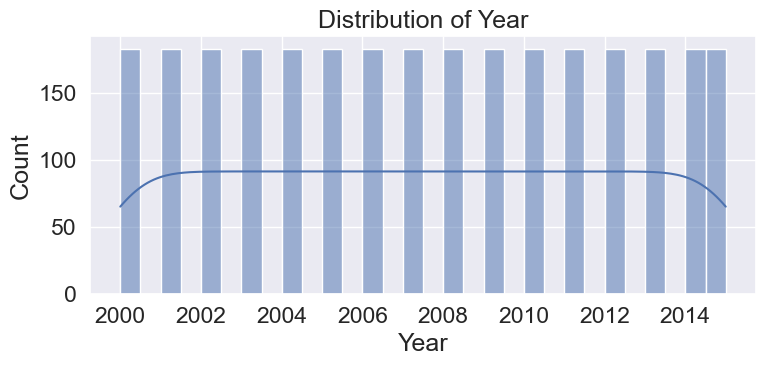

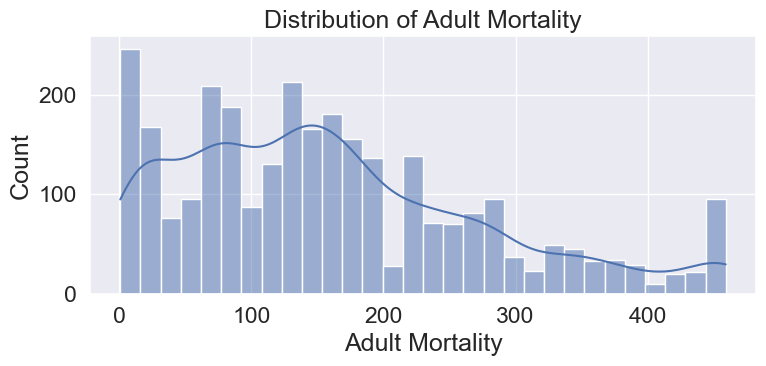

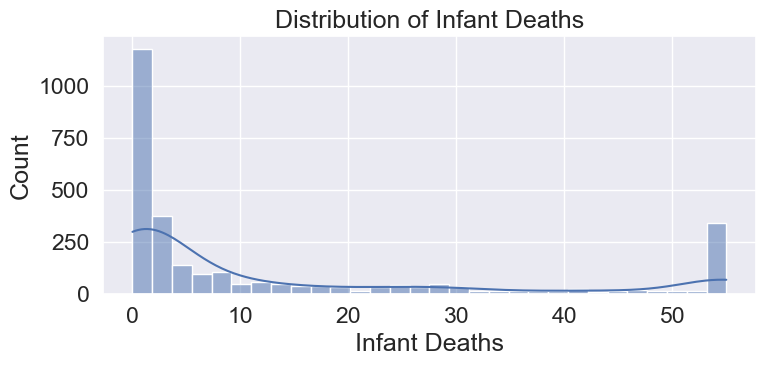

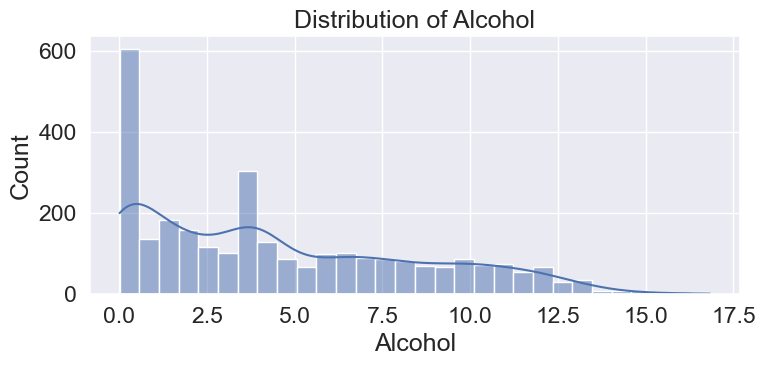

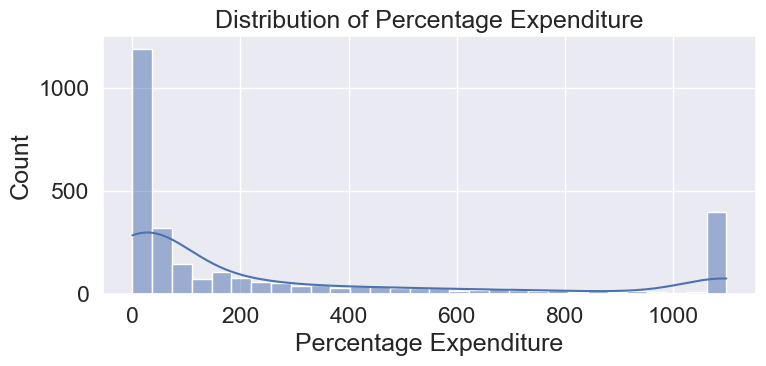

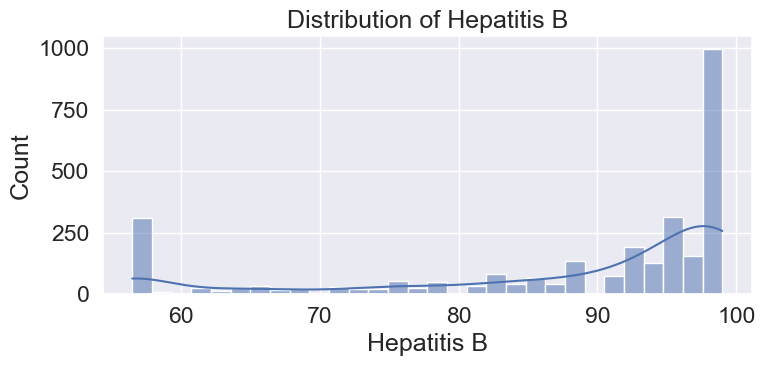

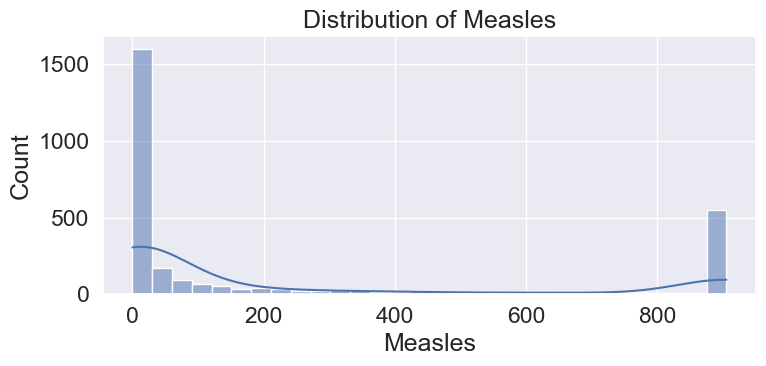

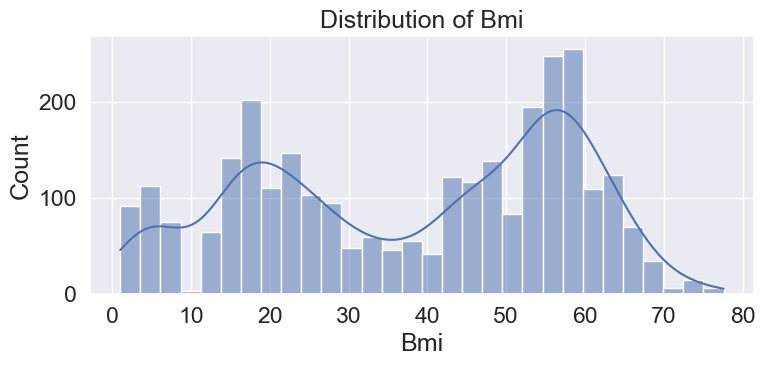

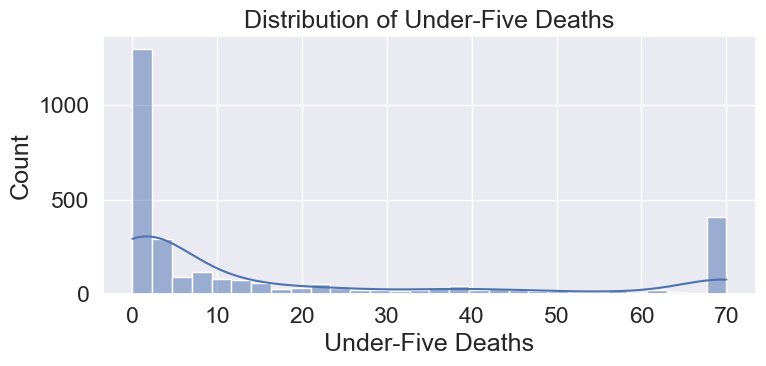

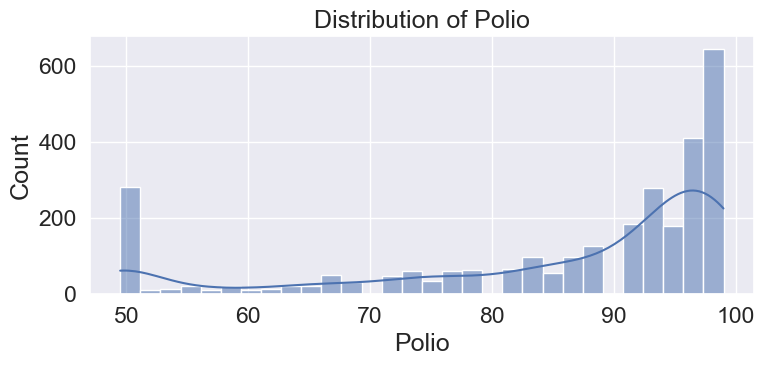

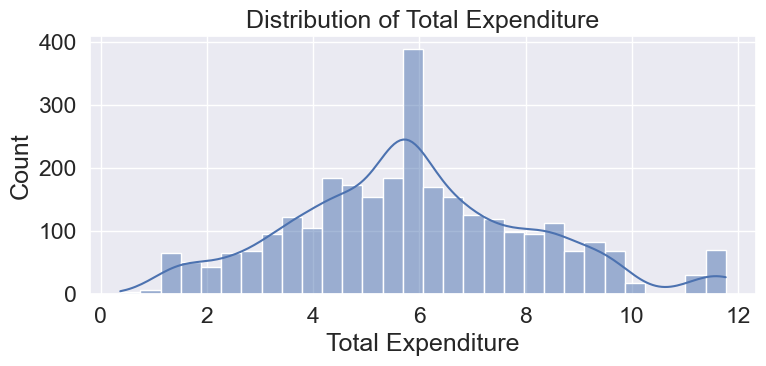

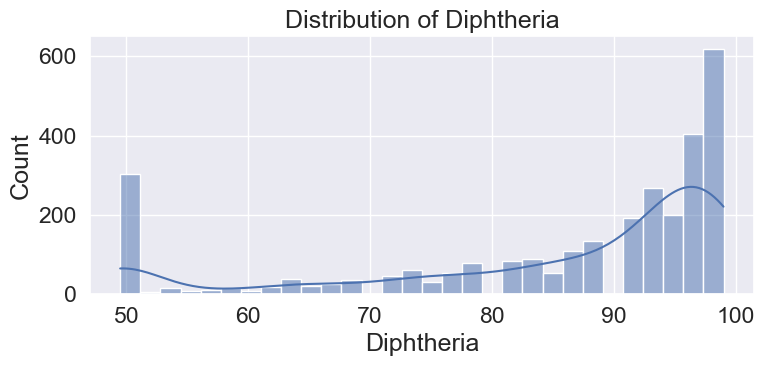

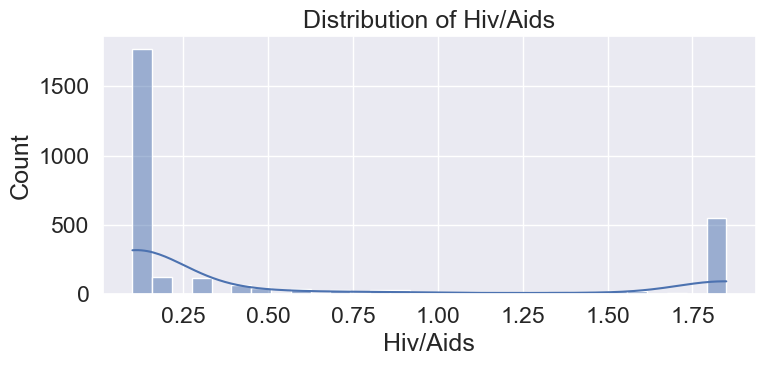

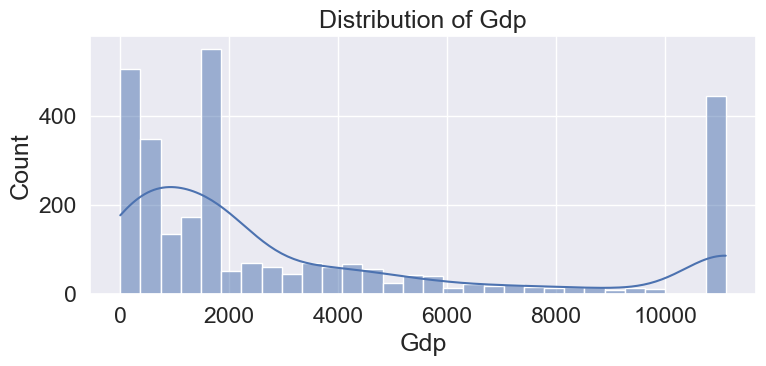

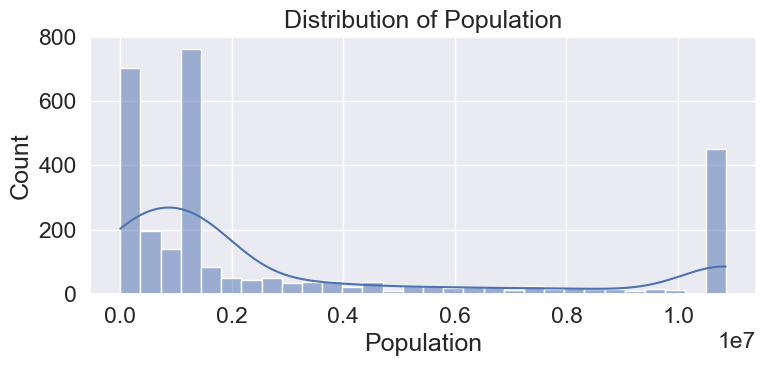

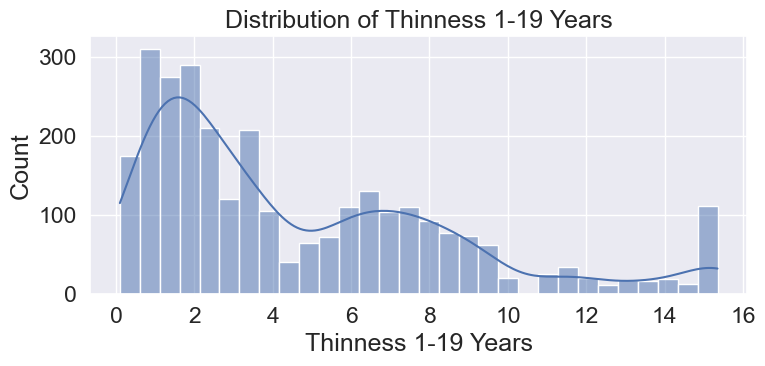

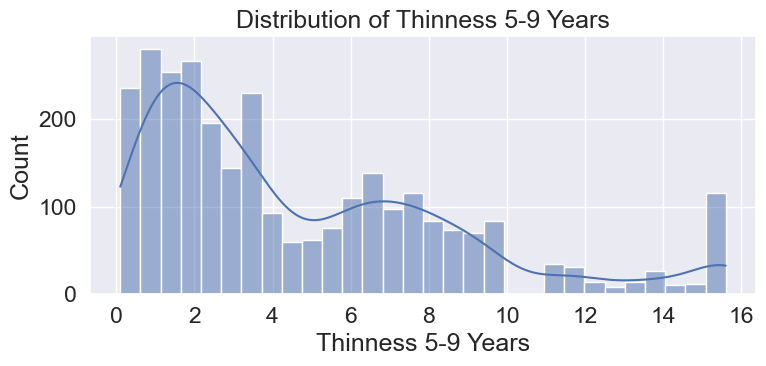

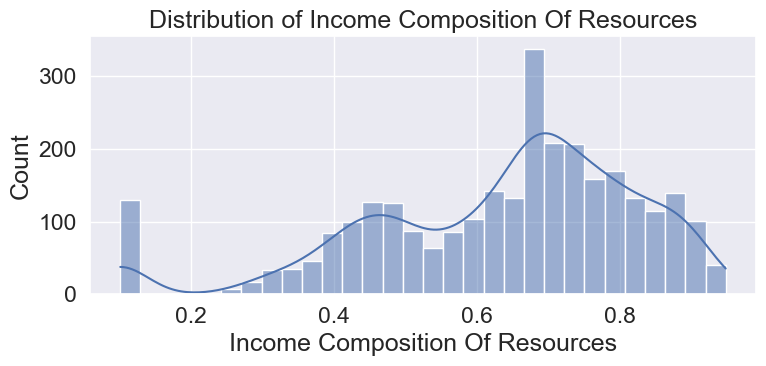

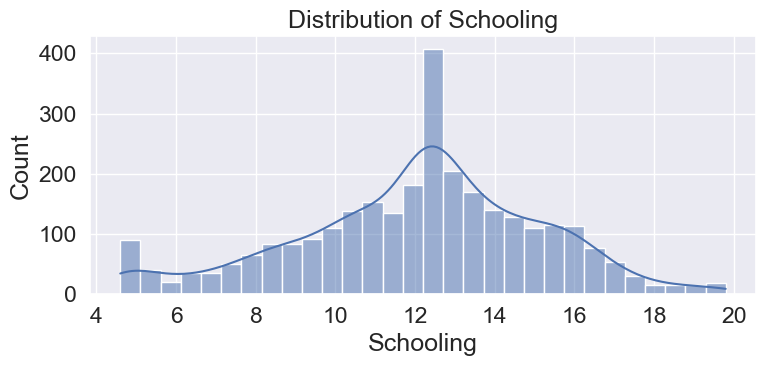

In [34]:
for feature in numerical_cols:
    plt.figure(figsize = (8,4))
    sns.histplot(df_capped[feature], kde = True, bins = 30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# Checking the skewness

In [35]:
Skewness_before = df_capped.select_dtypes(include =["number"]).skew()
print(Skewness_before)

Year                               0.000000
Life Expectancy                   -0.638605
Adult Mortality                    0.777243
Infant Deaths                      1.284006
Alcohol                            0.643809
Percentage Expenditure             1.243088
Hepatitis B                       -1.250056
Measles                            1.181978
Bmi                               -0.239842
Under-Five Deaths                  1.234535
Polio                             -1.235595
Total Expenditure                  0.282613
Diphtheria                        -1.254593
Hiv/Aids                           1.204141
Gdp                                1.155462
Population                         1.188389
Thinness 1-19 Years                1.086849
Thinness 5-9 Years                 1.103044
Income Composition Of Resources   -0.906568
Schooling                         -0.316263
dtype: float64


# We can clearly see that 
### We have to do transformation on the following -> 
1) Life Expectancy
2) Adult Mortality
3) Infant Deaths
4) Alcohol
5) Percentage Expenditure
6) Hepatitis B
7) Measles
8) Under-Five Deaths
9) Polio
10) Diphtheria
11) Hiv/Aids
12) Gdp
13) Population
14) Thinness  1-19 Years
15) Thinness 5-9 Years
16) Income Composition Of Resources

In [36]:
from scipy.stats import boxcox

In [37]:
After_Transformation_df = df_capped.copy()

Numerical_Cols = ["Adult Mortality","Infant Deaths", "Alcohol", "Percentage Expenditure", "Hepatitis B", 
                  "Measles", "Under-Five Deaths", "Polio", "Diphtheria", "Hiv/Aids", "Gdp", "Population", "Thinness 1-19 Years",
                  "Thinness 5-9 Years", "Income Composition Of Resources"]

for cols in Numerical_Cols:
    After_Transformation_df[cols], _ = boxcox(After_Transformation_df[cols] + 1)

In [38]:
Skewness_After = After_Transformation_df.select_dtypes(include = ["number"]).skew()
Skewness_After

Year                               0.000000
Life Expectancy                   -0.638605
Adult Mortality                   -0.120640
Infant Deaths                      0.124852
Alcohol                           -0.084721
Percentage Expenditure            -0.111917
Hepatitis B                       -0.604864
Measles                            0.082364
Bmi                               -0.239842
Under-Five Deaths                  0.112913
Polio                             -0.565132
Total Expenditure                  0.282613
Diphtheria                        -0.563162
Hiv/Aids                           0.779158
Gdp                               -0.071922
Population                        -0.119222
Thinness 1-19 Years                0.009367
Thinness 5-9 Years                 0.002726
Income Composition Of Resources   -0.123101
Schooling                         -0.316263
dtype: float64

In [39]:
skew_comparison = pd.DataFrame({
    "Skewness Before": Skewness_before,
    "Skewness After": Skewness_After
})
skew_comparison

,Skewness Before,Skewness After
Year,0.000000,0.000000
Life Expectancy,-0.638605,-0.638605
Adult Mortality,0.777243,-0.120640
Infant Deaths,1.284006,0.124852
Alcohol,0.643809,-0.084721
Percentage Expenditure,1.243088,-0.111917
Hepatitis B,-1.250056,-0.604864
Measles,1.181978,0.082364
Bmi,-0.239842,-0.239842
Under-Five Deaths,1.234535,0.112913


## Handling Categorical Features (encoding)
### Country
### Status

In [40]:
After_Transformation_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

In [41]:
After_Transformation_df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

# The correct way is to store a separate encoder for each column:

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a dictionary to hold encoders for each categorical column
encoders = {}

cols_to_encode = ['Country', 'Status']

for col in cols_to_encode:
    le = LabelEncoder()
    After_Transformation_df[col] = le.fit_transform(After_Transformation_df[col])
    encoders[col] = le   # store the encoder for later use


# Values After Handling

In [43]:
After_Transformation_df['Country'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  43,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [44]:
After_Transformation_df['Status'].unique()

array([1, 0])

In [45]:
After_Transformation_df.head()

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,0,2015,1,65.0,26.075147,2.920834,0.009963,5.333236,5.439365e+09,5.671612,19.1,3.188156,2.195461e+07,8.16,8.004173e+07,0.082656,12.400637,153.392322,2.641053,2.762519,0.894334,10.1
1,0,2014,1,59.9,26.465659,2.920834,0.009963,5.380060,4.159090e+09,5.246866,18.6,3.188156,4.564601e+07,8.18,6.428136e+07,0.082656,12.560612,68.904449,2.641053,2.762519,0.885495,10.0
2,0,2013,1,59.9,26.319954,2.920834,0.009963,5.373784,4.980782e+09,5.151214,18.1,3.188156,6.215028e+07,8.13,7.448389e+07,0.082656,12.664442,153.392322,2.641053,2.762519,0.867964,9.9
3,0,2012,1,59.5,26.514035,2.920834,0.009963,5.473386,6.461612e+09,5.671612,17.6,3.188156,8.902302e+07,8.52,9.213586e+07,0.082656,12.865330,120.247094,2.641053,2.762519,0.847761,9.8
4,0,2011,1,59.2,26.658590,2.920834,0.009963,2.324363,7.029368e+09,5.671612,17.2,3.188156,9.535275e+07,7.87,9.869929e+07,0.082656,6.354814,114.487693,2.641053,2.762519,0.822176,9.5


In [46]:
Final_df = After_Transformation_df.copy()

In [47]:
Final_df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', 'Bmi', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria', 'Hiv/Aids', 'Gdp', 'Population', 'Thinness 1-19 Years',
       'Thinness 5-9 Years', 'Income Composition Of Resources', 'Schooling'],
      dtype='object')

# Splitting Features from Target

In [48]:
x = Final_df.drop('Life Expectancy', axis=1)
y = Final_df['Life Expectancy']

In [49]:
x.head()

,Country,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,0,2015,1,26.075147,2.920834,0.009963,5.333236,5.439365e+09,5.671612,19.1,3.188156,2.195461e+07,8.16,8.004173e+07,0.082656,12.400637,153.392322,2.641053,2.762519,0.894334,10.1
1,0,2014,1,26.465659,2.920834,0.009963,5.380060,4.159090e+09,5.246866,18.6,3.188156,4.564601e+07,8.18,6.428136e+07,0.082656,12.560612,68.904449,2.641053,2.762519,0.885495,10.0
2,0,2013,1,26.319954,2.920834,0.009963,5.373784,4.980782e+09,5.151214,18.1,3.188156,6.215028e+07,8.13,7.448389e+07,0.082656,12.664442,153.392322,2.641053,2.762519,0.867964,9.9
3,0,2012,1,26.514035,2.920834,0.009963,5.473386,6.461612e+09,5.671612,17.6,3.188156,8.902302e+07,8.52,9.213586e+07,0.082656,12.865330,120.247094,2.641053,2.762519,0.847761,9.8
4,0,2011,1,26.658590,2.920834,0.009963,2.324363,7.029368e+09,5.671612,17.2,3.188156,9.535275e+07,7.87,9.869929e+07,0.082656,6.354814,114.487693,2.641053,2.762519,0.822176,9.5


In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [51]:
print(f" x_train shape : {x_train.shape}")
print(f" x_test shape : {x_test.shape}")
print(f" y_train shape : {y_train.shape}")
print(f" y_test shape : {y_test.shape}")

 x_train shape : (2342, 21)
 x_test shape : (586, 21)
 y_train shape : (2342,)
 y_test shape : (586,)


# Scaling the data to bring them to the equal scale

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [53]:
x.head()

,Country,Year,Status,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,Bmi,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,Hiv/Aids,Gdp,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling
0,0,2015,1,26.075147,2.920834,0.009963,5.333236,5.439365e+09,5.671612,19.1,3.188156,2.195461e+07,8.16,8.004173e+07,0.082656,12.400637,153.392322,2.641053,2.762519,0.894334,10.1
1,0,2014,1,26.465659,2.920834,0.009963,5.380060,4.159090e+09,5.246866,18.6,3.188156,4.564601e+07,8.18,6.428136e+07,0.082656,12.560612,68.904449,2.641053,2.762519,0.885495,10.0
2,0,2013,1,26.319954,2.920834,0.009963,5.373784,4.980782e+09,5.151214,18.1,3.188156,6.215028e+07,8.13,7.448389e+07,0.082656,12.664442,153.392322,2.641053,2.762519,0.867964,9.9
3,0,2012,1,26.514035,2.920834,0.009963,5.473386,6.461612e+09,5.671612,17.6,3.188156,8.902302e+07,8.52,9.213586e+07,0.082656,12.865330,120.247094,2.641053,2.762519,0.847761,9.8
4,0,2011,1,26.658590,2.920834,0.009963,2.324363,7.029368e+09,5.671612,17.2,3.188156,9.535275e+07,7.87,9.869929e+07,0.082656,6.354814,114.487693,2.641053,2.762519,0.822176,9.5


# Building ANN Model

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model #for model visualization

In [55]:
model = keras.Sequential()
model.add(Dense(64, activation='relu', input_shape=(x_train_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # linear = no activation for regression

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(
    optimizer='adam',
    loss='mse',          # mean squared error for regression
    metrics=['mae']      # mean absolute error (easy to interpret)
)

In [57]:
history = model.fit(
    x_train_scaled, y_train,
    validation_split = 0.2,
    epochs = 300,
    batch_size = 32,
    verbose = 1
)

Epoch 1/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4274.2524 - mae: 64.5748 - val_loss: 3428.6267 - val_mae: 57.7299
Epoch 2/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1976.5311 - mae: 40.8258 - val_loss: 844.1816 - val_mae: 24.6423
Epoch 3/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 571.9023 - mae: 20.0637 - val_loss: 444.7417 - val_mae: 17.8533
Epoch 4/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 319.7420 - mae: 14.6475 - val_loss: 265.6204 - val_mae: 13.4013
Epoch 5/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196.6338 - mae: 11.2536 - val_loss: 177.8630 - val_mae: 10.6889
Epoch 6/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 134.4294 - mae: 9.2333 - val_loss: 129.5314 - val_mae: 9.0072
Epoch 7/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.7218 - mae: 7.9665 - val_loss: 98.9046 - val_mae: 7.9079
Epoch 8/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 81.6284 - mae: 7.1960 - val_loss: 80.9770 - val_mae: 7.1436
Epoch 9/300
59/59 ━━━━

# Evaluating on Test Data with R²

In [58]:
from sklearn.metrics import r2_score

# Predictions on test set
y_pred = model.predict(x_test_scaled)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R² Score: 0.9153008958546267


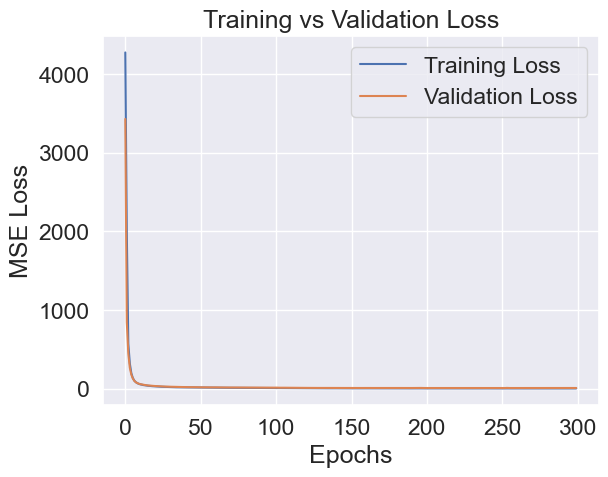

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


# ANN Model with Dropout

In [60]:
# --- Reproducibility ---
import os, random, numpy as np, tensorflow as tf
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# for complete reproducibility (slows down a bit)
tf.config.experimental.enable_op_determinism()

In [61]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Dropout model
dropout_model = keras.Sequential([
    layers.Input(shape=(x_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='linear')
])

In [62]:
dropout_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [63]:
dropout_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,137 (43.50 KB)

 Trainable params: 11,137 (43.50 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
history_dropout = dropout_model.fit(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4083.2507 - mae: 63.0576 - val_loss: 2729.5259 - val_mae: 51.5748
Epoch 2/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1238.3829 - mae: 31.1706 - val_loss: 468.4841 - val_mae: 18.5350
Epoch 3/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 367.2202 - mae: 15.7867 - val_loss: 232.2259 - val_mae: 12.4241
Epoch 4/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 243.2469 - mae: 12.5351 - val_loss: 136.2571 - val_mae: 9.1937
Epoch 5/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 185.6135 - mae: 10.8843 - val_loss: 101.0579 - val_mae: 7.8439
Epoch 6/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.9652 - mae: 10.0415 - val_loss: 85.5864 - val_mae: 7.2832
Epoch 7/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.3862 - mae: 9.5706 - val_loss: 71.2314 - val_mae: 6.6219
Epoch 8/100
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 138.8427 - mae: 9.5028 - val_loss: 66.5409 - val_mae: 6.3740
Epoch 9/100
59/59 ━━━━━

In [65]:
# --- Evaluate ---
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = dropout_model.predict(x_test_scaled).ravel()
print("Dropout Model Performance:")
print(f"R2 : {r2_score(y_test, y_pred):.4f} | "
      f"MSE : {mean_squared_error(y_test, y_pred):.4f} | "
      f"MAE : {mean_absolute_error(y_test, y_pred):.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Dropout Model Performance:
R2 : 0.8460 | MSE : 13.3250 | MAE : 2.7577


# Visualization

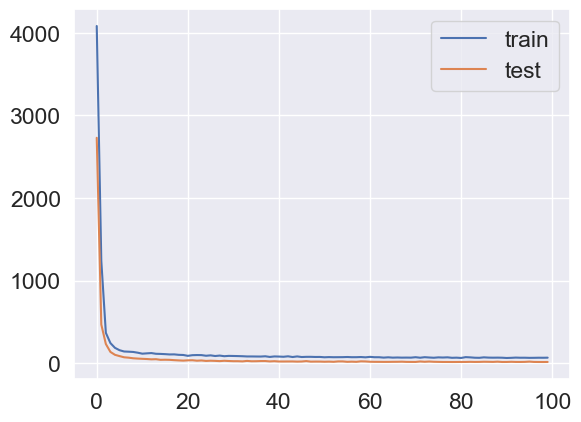

In [66]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history_dropout.history['loss'], label='train')
plt.plot(history_dropout.history['val_loss'], label='test')
plt.legend()
plt.show()

# ANN Model with EarlyStopping

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
early_model = keras.Sequential([
    layers.Input(shape=(x_train_scaled.shape[1],)),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'linear')
])

In [69]:
early_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [70]:
early_stop = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0005,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [71]:
history_early = early_model.fit(
    x_train_scaled, y_train,
    validation_split = 0.2,
    epochs = 300,
    batch_size = 32,
    callbacks = [early_stop],
    verbose = 1
)

Epoch 1/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3648.7798 - mae: 58.9425 - val_loss: 1765.4409 - val_mae: 40.0804
Epoch 2/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 725.2772 - mae: 22.7383 - val_loss: 369.7045 - val_mae: 16.1597
Epoch 3/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240.2167 - mae: 12.5277 - val_loss: 173.3029 - val_mae: 10.6072
Epoch 4/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126.6109 - mae: 8.9859 - val_loss: 105.6737 - val_mae: 8.0222
Epoch 5/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 88.3272 - mae: 7.4787 - val_loss: 78.7009 - val_mae: 6.9628
Epoch 6/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 70.5367 - mae: 6.6861 - val_loss: 65.0925 - val_mae: 6.3569
Epoch 7/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 59.9036 - mae: 6.1670 - val_loss: 56.8114 - val_mae: 5.9677
Epoch 8/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 52.5828 - mae: 5.7780 - val_loss: 51.1198 - val_mae: 5.6771
Epoch 9/300
59/59 ━━━━━━━━━━━━━━

In [72]:
# --- Evaluate ---
y_pred = early_model.predict(x_test_scaled).ravel()
print("EarlyStopping Model Performance:")
print(f"R2: {r2_score(y_test, y_pred):.4f} | "
      f"MSE: {mean_squared_error(y_test, y_pred):.4f} | "
      f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
EarlyStopping Model Performance:
R2: 0.8852 | MSE: 9.9296 | MAE: 2.3122


# Visualization

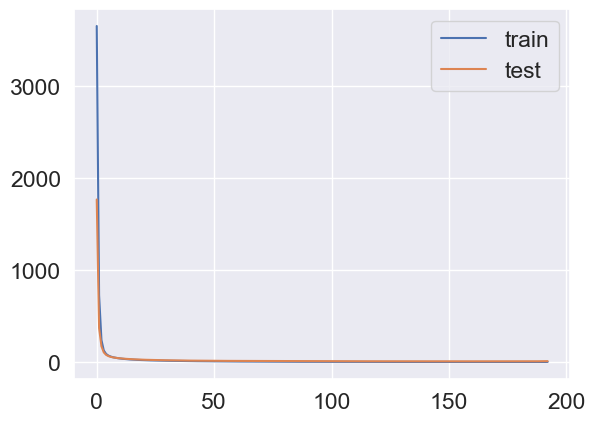

In [73]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history_early.history['loss'], label='train')
plt.plot(history_early.history['val_loss'], label='test')
plt.legend()
plt.show()


# ANN Model with (Dropout + EarlyStopping)

In [74]:
# --- Reproducibility ---
import os, random, numpy as np, tensorflow as tf
seed = 42
os.environ['PYTHONASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.config.experimental.enable_op_determinism()

In [75]:
# Dropout + EarlyStopping model
combo_model = keras.Sequential([
    layers.Input(shape=(x_train_scaled.shape[1],)),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation = 'linear')
])

In [76]:
combo_model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

early_stop = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.0005,
    patience = 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)

In [77]:
history_combo = combo_model.fit(
    x_train_scaled, y_train,
    validation_split = 0.2,
    epochs = 300,
    batch_size = 32,
    callbacks = [early_stop],
    verbose = 1
)

Epoch 1/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4083.2507 - mae: 63.0576 - val_loss: 2729.5259 - val_mae: 51.5748
Epoch 2/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1238.3829 - mae: 31.1706 - val_loss: 468.4841 - val_mae: 18.5350
Epoch 3/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 367.2202 - mae: 15.7867 - val_loss: 232.2259 - val_mae: 12.4241
Epoch 4/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 243.2469 - mae: 12.5351 - val_loss: 136.2571 - val_mae: 9.1937
Epoch 5/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 185.6135 - mae: 10.8843 - val_loss: 101.0579 - val_mae: 7.8439
Epoch 6/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 156.9652 - mae: 10.0415 - val_loss: 85.5864 - val_mae: 7.2832
Epoch 7/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 141.3862 - mae: 9.5706 - val_loss: 71.2314 - val_mae: 6.6219
Epoch 8/300
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138.8427 - mae: 9.5028 - val_loss: 66.5409 - val_mae: 6.3740
Epoch 9/300
59/59 ━━━━━

In [78]:
# --- Evaluate ---
y_pred = combo_model.predict(x_test_scaled).ravel()
print('Dropout + EarlyStopping Model Performance:')
print(f"R2: {r2_score(y_test, y_pred):.4f} | "
      f"MSE: {mean_squared_error(y_test, y_pred):.4f} | "
      f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Dropout + EarlyStopping Model Performance:
R2: 0.8622 | MSE: 11.9199 | MAE: 2.6584


# Visualization

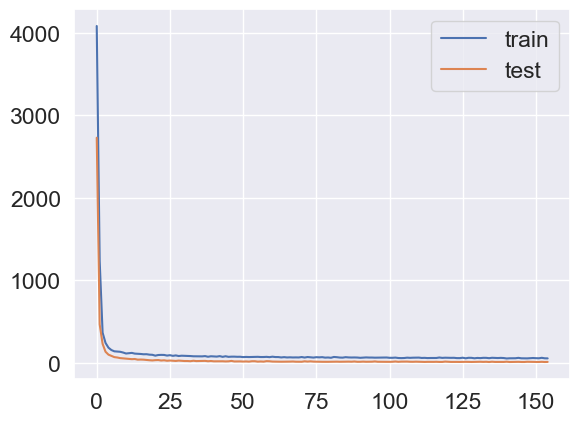

In [79]:
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history_combo.history['loss'], label='train')
plt.plot(history_combo.history['val_loss'], label='test')
plt.legend()
plt.show()


In [80]:
pip install keras-tuner --quiet

Note: you may need to restart the kernel to use updated packages.


# Model Builder

In [81]:
import keras_tuner as kt
from keras_tuner import RandomSearch

In [82]:
def build_model(hp):
    model = keras.Sequential()
    
    # Input Layer
    model.add(layers.Input(shape=(x_train_scaled.shape[1],)))
    
    # Tune number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):  
        # Tune number of neurons in each hidden layer
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
            activation=hp.Choice('activation', ['relu', 'tanh'])
        ))
        
        # Tune dropout rate for each layer
        model.add(layers.Dropout(
            rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
        ))

    # Output Layer (regression → linear activation)
    model.add(layers.Dense(1, activation='linear'))

    # Optimizer & Learning rate
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

    # Compile the model
    model.compile(
        optimizer=optimizer,
        loss='mse',
        metrics=['mae']
    )
    
    return model


# Running Tuner

In [83]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,           # how many different combinations to try
    executions_per_trial=2,  # how many times each combination runs
    directory='tuner_dir',
    project_name='life_expectancy'
)

# EarlyStopping to avoid wasteful training
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

tuner.search(
    x_train_scaled, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Get the best model
best_ann_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
best_test_loss, best_test_mae_with_tuner = best_ann_model.evaluate(x_test_scaled, y_test)
print(f"Test MAE with Keras Tuner: {best_test_mae_with_tuner:.4f}")

# Calculate R² for the tuned model
y_pred_with_tuner = best_ann_model.predict(x_test_scaled)
r2_with_tuner = r2_score(y_test, y_pred_with_tuner)
print(f"R² with Keras Tuner: {r2_with_tuner:.4f}")

Reloading Tuner from tuner_dir\life_expectancy\tuner0.json

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.2252 - mae: 1.6348  
Test MAE with Keras Tuner: 1.6348
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
R² with Keras Tuner: 0.9396


In [84]:
# Evaluate
y_pred_best = best_ann_model.predict(x_test_scaled).ravel()
print("Best Tuned Model Performance:")
print(f"R²: {r2_score(y_test, y_pred_best):.4f} | "
      f"MSE: {mean_squared_error(y_test, y_pred_best):.4f} | "
      f"MAE: {mean_absolute_error(y_test, y_pred_best):.4f}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Best Tuned Model Performance:
R²: 0.9396 | MSE: 5.2252 | MAE: 1.6348


# Comparison of all the models

In [86]:
from sklearn.metrics import mean_absolute_error, r2_score

# Dictionary to store results
results = {}

# ---------------- Baseline ----------------
y_pred_baseline = model.predict(x_test_scaled)
results["Baseline"] = {
    "Test MAE": mean_absolute_error(y_test, y_pred_baseline),
    "Test R²": r2_score(y_test, y_pred_baseline)
}

# ---------------- Dropout ----------------
y_pred_dropout = dropout_model.predict(x_test_scaled)
results["Dropout"] = {
    "Test MAE": mean_absolute_error(y_test, y_pred_dropout),
    "Test R²": r2_score(y_test, y_pred_dropout)
}

# ---------------- EarlyStopping ----------------
y_pred_early = early_model.predict(x_test_scaled)
results["EarlyStopping"] = {
    "Test MAE": mean_absolute_error(y_test, y_pred_early),
    "Test R²": r2_score(y_test, y_pred_early)
}

# ---------------- Dropout + EarlyStopping ----------------
y_pred_both = combo_model.predict(x_test_scaled)
results["Dropout + EarlyStopping"] = {
    "Test MAE": mean_absolute_error(y_test, y_pred_both),
    "Test R²": r2_score(y_test, y_pred_both)
}

# ---------------- Keras Tuner Best ----------------
y_pred_tuner = best_ann_model.predict(x_test_scaled)
results["Keras Tuner Best"] = {
    "Test MAE": mean_absolute_error(y_test, y_pred_tuner),
    "Test R²": r2_score(y_test, y_pred_tuner)
}

# Convert to DataFrame for comparison
comparison_df = pd.DataFrame(results).T.reset_index()
comparison_df.columns = ["Model", "Test MAE ↓", "Test R² ↑"]

# Display nicely
print(comparison_df)

# (Optional) Pretty display if using Jupyter/Colab
try:
    from tabulate import tabulate
    print(tabulate(comparison_df, headers='keys', tablefmt='pretty', showindex=False))
except:
    pass

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
                     Model  Test MAE ↓  Test R² ↑
0                 Baseline    1.986351   0.915301
1                  Dropout    2.757723   0.845953
2            EarlyStopping    2.312195   0.885206
3  Dropout + EarlyStopping    2.658389   0.862197
4         Keras Tuner Best    1.634843   0.939592
+-------------------------+--------------------+--------------------+
|          Model          |     Test MAE ↓     |     Test R² ↑      |
+-------------------------+--------------------+--------------------+
|        Baseline         | 1.9863511733227623 | 0.9153008958546267 |
|         Dropout         | 2.7577231110973166 | 0.8459531566310152 |
|      EarlyStopping      | 2.312194999981252  | 0.8852061261010464 |
| Dropout + EarlyStopping | 2.658388856490724  | 0.8621968581911009 |
|    Keras

# Life Expectancy Prediction

In [87]:
def predict_life_expectancy():
    """Takes user input and predicts Life Expectancy."""


    # Get user input
    country = input("Enter Country: ")
    year = float(input("Enter Year: "))
    status = input("Enter Status (Developed/Developing): ")

    adult_mortality = float(input("Enter Adult Mortality: "))
    infant_deaths = float(input("Enter Infant Deaths: "))
    alcohol = float(input("Enter Alcohol Consumption: "))
    percentage_expenditure = float(input("Enter Percentage Expenditure: "))
    hepatitis_b = float(input("Enter Hepatitis B: "))
    measles = float(input("Enter Measles Cases: "))
    bmi = float(input("Enter BMI: "))
    under_five_deaths = float(input("Enter Under-Five Deaths: "))
    polio = float(input("Enter Polio Coverage: "))
    total_expenditure = float(input("Enter Total Expenditure: "))
    diphtheria = float(input("Enter Diphtheria Coverage: "))
    hiv_aids = float(input("Enter HIV/AIDS Rate: "))
    gdp = float(input("Enter GDP: "))
    population = float(input("Enter Population: "))
    thinness_1_19_years = float(input("Enter Thinness 1-19 Years: "))
    thinness_5_9_years = float(input("Enter Thinness 5-9 Years: "))
    income_comp = float(input("Enter Income Composition of Resources: "))
    schooling = float(input("Enter Schooling: "))

    # Apply Label Encoding using the stored encoders
    country_encoded = encoders["Country"].transform([country])[0]
    status_encoded = encoders["Status"].transform([status])[0]

    # Arrange inputs in same order as training features
    user_input = np.array([[country_encoded, year, status_encoded,
                            adult_mortality, infant_deaths, alcohol,
                            percentage_expenditure, hepatitis_b, measles,
                            bmi, under_five_deaths, polio, total_expenditure,
                            diphtheria, hiv_aids, gdp, population,
                            thinness_1_19_years, thinness_5_9_years,
                            income_comp, schooling]])

    # Scale input
    user_input_scaled = scaler.transform(user_input)

    # Predict using your trained model
    prediction = best_ann_model.predict(user_input_scaled)

    print("\nPredicted Life Expectancy:", round(prediction[0][0], 2))

# Example: Call the function
predict_life_expectancy()
    

Enter Country:  India
Enter Year:  2005
Enter Status (Developed/Developing):  Developing
Enter Adult Mortality:  56
Enter Infant Deaths:  55
Enter Alcohol Consumption:  4.6
Enter Percentage Expenditure:  42.3
Enter Hepatitis B:  12
Enter Measles Cases:  25
Enter BMI:  15
Enter Under-Five Deaths:  66
Enter Polio Coverage:  13
Enter Total Expenditure:  7.13
Enter Diphtheria Coverage:  4.55
Enter HIV/AIDS Rate:  33.3
Enter GDP:  556.55
Enter Population:  45125411
Enter Thinness 1-19 Years:  23.1
Enter Thinness 5-9 Years:  13.6
Enter Income Composition of Resources:  0.401
Enter Schooling:  9.2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step

Predicted Life Expectancy: 48.87
